In [59]:
%pylab inline

import pandas as pd

from autograd import grad
import autograd.numpy as np

Populating the interactive namespace from numpy and matplotlib


In [289]:
X = np.array([
    [ 0.3213,  0.4856,  0.2995,  2.5044],
    [ 0.3005,  0.4757,  0.2974,  2.4691],
    [ 0.5638,  0.8005,  0.3381,  2.3102],
    [ 0.5281,  0.6542,  0.3129,  2.1298],
    [ 0.3221,  0.5126,  0.3085,  2.6147],
    [ 0.3055,  0.4885,  0.289 ,  2.4957],
    [ 0.3276,  0.5185,  0.3218,  2.6013],
    [ 0.5313,  0.7028,  0.3266,  2.1543],
    [ 0.4728,  0.6399,  0.3062,  2.0597],
    [ 0.3221,  0.5126,  0.3085,  2.6147]
])
y = np.array([1., 1., 0., 0., 1., 1., 1., 0., 0., 0.])

# X = np.array([
#         [0.52, 1.12,  0.77],
#         [0.88, -1.08, 0.15],
#         [0.52, 0.06, -1.30],
#         [0.74, -2.49, 1.39]
#     ])
# y = np.array([1., 1., 0., 1.])

weights = np.zeros(X.shape[1])
eps = 1e-15

In [293]:
def wTx(w, x):
    return np.dot(x, w)

def sigmoid(z):
    return 1./(1+np.exp(-z))

def logistic_predictions(w, x):
    predictions = sigmoid(wTx(w, x))
    predictions = np.maximum(eps, predictions)
    return np.minimum(predictions, 1-eps)

def log_loss(w, X, y):
    y_predicted = logistic_predictions(w, X)
    return -(y*np.log(y_predicted) + (1-y)*np.log(1-y_predicted)).mean()

gradient = grad(log_loss)

def custom_loss(w, X, y):
    y_predicted = logistic_predictions(w, X)
    greater_than_point_2 = (y - y_predicted) > .2
    return 10*greater_than_point_2.mean()

custom_gradient = grad(custom_loss)

In [294]:
0.69314718056
0.329817178388
0.300126372862
0.29124055573
0.287176035922
0.28488997884

0.28488997884

In [295]:
for i in range(10):
    if i % 1000 == 0:
        print(log_loss(weights, X, y))
    weights -= custom_gradient(weights, X, y) * .25

0.69314718056


/usr/local/lib/python3.4/site-packages/autograd/core.py:65: UserWarning: Output seems independent of input. Returning zero gradient.
  warnings.warn("Output seems independent of input. Returning zero gradient.")


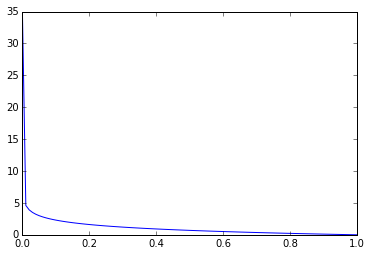

In [180]:
df = pd.DataFrame(
    [(x, log_loss(x)) for x in np.linspace(0, 1, 101)],
    columns=['x', 'log_loss']
)
plt.plot(df['x'], df['log_loss'])

In [177]:
preds = logistic_predictions(weights, X)
print(preds)

[ 0.5  0.5  0.5  0.5]


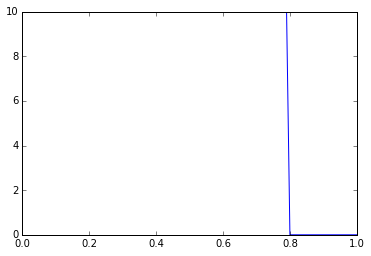

In [56]:
def loss(y, y_predicted):
    if abs(y-y_predicted) < .2:
        return 0
    return 10 

df = pd.DataFrame(
    [(x, loss(True, x)) for x in np.linspace(0, 1, 101)],
    columns=['x', 'loss']
)
plt.plot(df['x'], df['loss'])